In [1]:
""" Importation de pandas, numpy, seaborn, scikit-learn et matplotlib.pyplot """
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Retour sur la préparation des features quantitatives 

In [2]:
# Original dataset
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
               'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female'],
    'Age': [25, 30, 35, 40, 45, 27, 32, 37, 42, 47, 29, 34, 39, 44, 26, 31, 36, 41, 28, 33],
    'Education': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'High School', 'Bachelor', 'Master',
                  'High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master', 'PhD', 'High School', 'Bachelor', 'Master'],
    'Marital Status': ['Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single',
                       'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single'],
    'Employment Status': ['Employed', 'Unemployed', 'Employed', 'Employed', 'Employed', 'Unemployed', 'Employed', 'Employed', 'Employed', 'Unemployed',
                          'Employed', 'Unemployed', 'Employed', 'Employed', 'Employed', 'Unemployed', 'Employed', 'Employed', 'Employed', 'Unemployed']
}

# Convert the original data to a DataFrame
df = pd.DataFrame(data)

# Generate skewed income values using gamma distribution
skewed_income = np.random.gamma(2, 30000, len(df))  # Adjust shape parameter (2) for desired skewness

# Append the skewed income values to the DataFrame
df['Income'] = skewed_income

# Display the updated DataFrame
df

,Gender,Age,Education,Marital Status,Employment Status,Income
0,Male,25,High School,Married,Employed,30013.710823
1,Female,30,Bachelor,Single,Unemployed,36246.981279
2,Male,35,Master,Married,Employed,1942.404418
3,Female,40,PhD,Single,Employed,40356.062274
4,Male,45,Bachelor,Married,Employed,43949.780670
5,Male,27,Master,Single,Unemployed,27793.152611
6,Female,32,PhD,Married,Employed,116342.792120
7,Male,37,High School,Single,Employed,51852.949228
8,Female,42,Bachelor,Married,Employed,8411.121987
9,Male,47,Master,Single,Unemployed,20467.903285


In [3]:
df['Income'].describe()

count        20.000000
mean      42618.776738
std       36073.934954
min        1942.404418
25%       19510.989940
50%       33120.544267
75%       46873.433237
max      116342.792120
Name: Income, dtype: float64

## Standardscaler

In [4]:
""" Standardisation des données avec scikit-learn  StandardScaler  -> Standardisation des données 
en soustrayant la moyenne et en divisant par l'écart type """

# Importation de StandardScaler
from sklearn.preprocessing import StandardScaler

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Standardisation des données comme Income par exemple ici 
df['Income_std'] = scaler.fit_transform(df[['Income']])

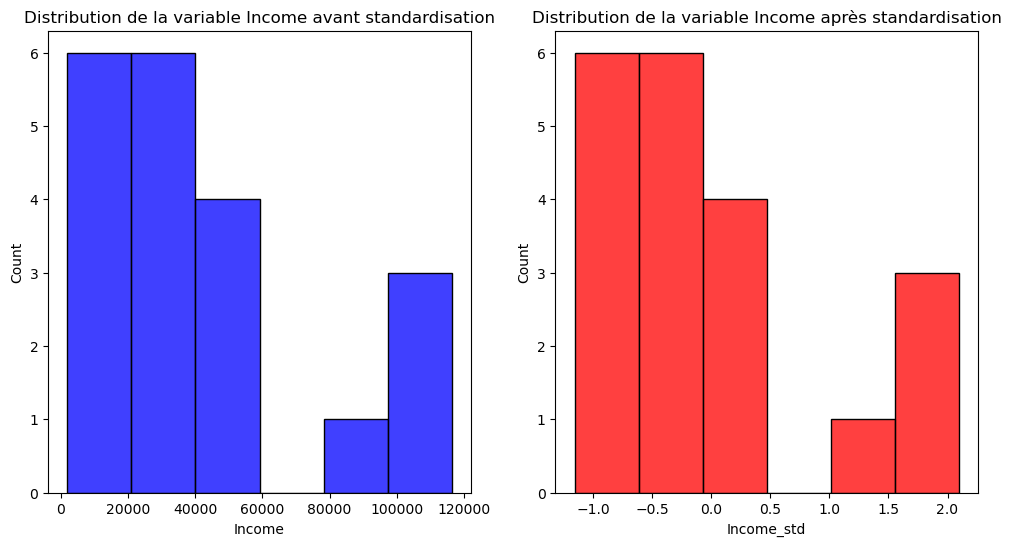

In [5]:
""" Affichage avec Seaborn de la distribution de la variable Income avant et après standardisation en subplot"""

# Création d'une figure
plt.figure(figsize=(12, 6))

# Distribution de la variable Income avant standardisation
plt.subplot(1, 2, 1)

sns.histplot(df['Income'], color='b', fill=True, label='Income')
plt.title('Distribution de la variable Income avant standardisation')

# Distribution de la variable Income après standardisation
plt.subplot(1, 2, 2)

sns.histplot(df['Income_std'], color='r', fill=True, label='Income_std')
plt.title('Distribution de la variable Income après standardisation')

# Affichage de la figure
plt.show()

## Log transformation

Text(0.5, 1.0, 'Distribution de la variable Income après transformation log')

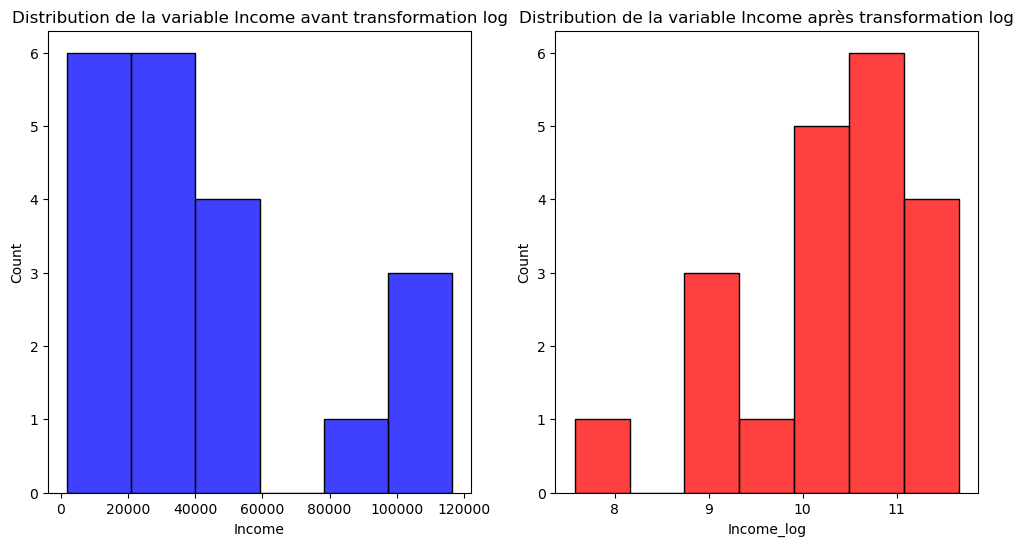

In [6]:
"""Création d'une variable log-transformée de Income et affichage de la distribution de la variable log-transformée avant et apres"""

# Création d'une variable log-transformée de Income
df['Income_log'] = np.log1p(df['Income'])

# Création d'une figure
plt.figure(figsize=(12, 6))

# Distribution de la variable Income avant transformation log
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], color='b', fill=True, label='Income')
plt.title('Distribution de la variable Income avant transformation log')

# Distribution de la variable Income après transformation log
plt.subplot(1, 2, 2)
sns.histplot(df['Income_log'], color='r', fill=True, label='Income_log')
plt.title('Distribution de la variable Income après transformation log')

## Min-Max Transformation

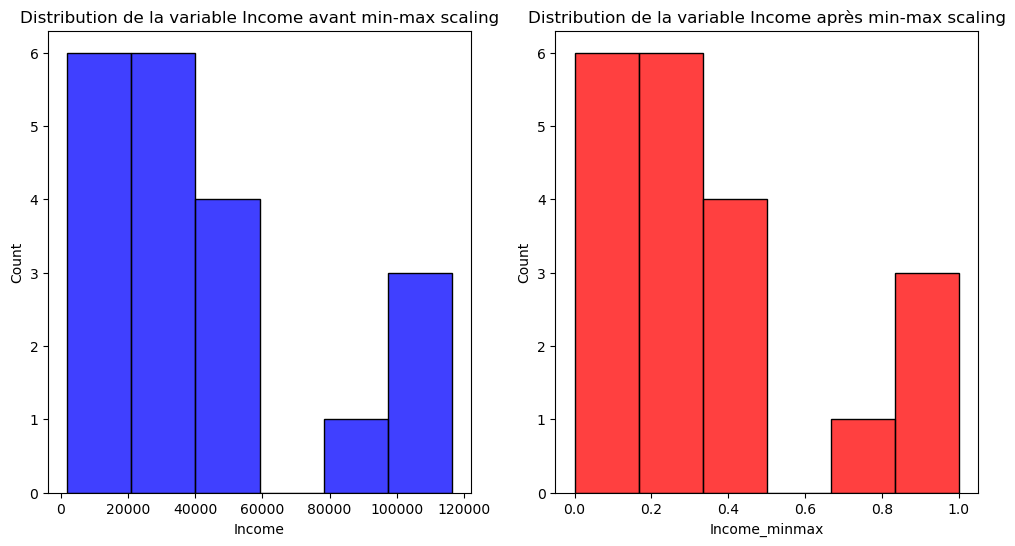

In [7]:
#Création d'une variable min-max scaled de Income et affichage de la distribution de la variable min-max scaled avant et après

# Importation de MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Création d'un objet MinMaxScaler
scaler = MinMaxScaler()

# Min-max scaling de la variable Income
df['Income_minmax'] = scaler.fit_transform(df[['Income']])

# Création d'une figure
plt.figure(figsize=(12, 6))

# Distribution de la variable Income avant min-max scaling
plt.subplot(1, 2, 1)
sns.histplot(df['Income'], color='b', fill=True, label='Income')

plt.title('Distribution de la variable Income avant min-max scaling')

# Distribution de la variable Income après min-max scaling
plt.subplot(1, 2, 2)
sns.histplot(df['Income_minmax'], color='r', fill=True, label='Income_minmax')
plt.title('Distribution de la variable Income après min-max scaling')

# Affichage de la figure
plt.show()

# Transformation sur les variables qualitatives

### Label Encoding

In [8]:
""" Mapping de la variable Gender de manière binaire à l'aide de LabelEncoder """

# Importation de LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
label_encoder = LabelEncoder()

# Mapping de Gender de manière binaire
df['Gender_label'] = label_encoder.fit_transform(df['Gender'])

# Affichage des 5 premières lignes du DataFrame
df.head()

,Gender,Age,Education,Marital Status,Employment Status,Income,Income_std,Income_log,Income_minmax,Gender_label
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1


In [9]:
df['Gender_label'].unique()

array([1, 0])

### Discrétisation + Ordinal Encoding

In [10]:
#Création de slices sur la variable age en tranche_age puis utilisation d'un ordinal encoder pour mapper les tranches d'âge

# Création de slices sur la variable Age
bins = [0, 30, 45, 60]

# Création de labels pour les tranches d'âge
labels = ['Jeune', 'Adulte', 'Senior']

# Création de la variable tranche_age
df['tranche_age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['tranche_age'].value_counts()

tranche_age
Adulte    13
Jeune      5
Senior     2
Name: count, dtype: int64

In [11]:
# Importation de OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

# Création d'un objet OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Jeune', 'Adulte', 'Senior']])

# Mapping des tranches d'âge
df['tranche_age_label'] = ordinal_encoder.fit_transform(df[['tranche_age']])

# Affichage des 5 premières lignes du DataFrame
df.head()

,Gender,Age,Education,Marital Status,Employment Status,Income,Income_std,Income_log,Income_minmax,Gender_label,tranche_age,tranche_age_label
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1,Jeune,0.0
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0,Adulte,1.0
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1,Adulte,1.0
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0,Adulte,1.0
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1,Senior,2.0


In [12]:
# Affichage des valeurs uniques de la variable tranche_age_labe
df['tranche_age_label'].value_counts()

tranche_age_label
1.0    13
0.0     5
2.0     2
Name: count, dtype: int64

## One hot encoding sur la variable Pays

In [13]:
# Ajouter une feature 'Pays' avec un choix de 4 pays
pays = ['France', 'États-Unis', 'Royaume-Uni', 'Canada']
df['Pays'] = np.random.choice(pays, len(df))

# Afficher le DataFrame mis à jour
df.head()


,Gender,Age,Education,Marital Status,Employment Status,Income,Income_std,Income_log,Income_minmax,Gender_label,tranche_age,tranche_age_label,Pays
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1,Jeune,0.0,Canada
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0,Adulte,1.0,Royaume-Uni
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1,Adulte,1.0,France
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0,Adulte,1.0,France
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1,Senior,2.0,Canada


In [14]:
#Observation des différentes valeurs prises par Education
df['Pays'].value_counts()

Pays
États-Unis     7
Canada         5
Royaume-Uni    4
France         4
Name: count, dtype: int64

In [15]:
""" Création d'un one-hot encoding de la variable Pays """

# Importation de OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Création d'un objet OneHotEncoder
onehot_encoder = OneHotEncoder()

# One-hot encoding de la variable Pays
onehot_encoded = onehot_encoder.fit_transform(df[['Pays']])

# Affichage de onehot_encoded
onehot_encoded

<20x4 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [16]:
onehot_encoder.get_feature_names_out()

array(['Pays_Canada', 'Pays_France', 'Pays_Royaume-Uni',
       'Pays_États-Unis'], dtype=object)

In [17]:
df_onehot = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())

# Concaténation de df et df_onehot
df = pd.concat([df, df_onehot], axis=1)

# Affichage des 5 premières lignes du DataFrame
df.head()

,Gender,Age,Education,Marital Status,Employment Status,Income,Income_std,Income_log,Income_minmax,Gender_label,tranche_age,tranche_age_label,Pays,Pays_Canada,Pays_France,Pays_Royaume-Uni,Pays_États-Unis
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1,Jeune,0.0,Canada,1.0,0.0,0.0,0.0
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0,Adulte,1.0,Royaume-Uni,0.0,0.0,1.0,0.0
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1,Adulte,1.0,France,0.0,1.0,0.0,0.0
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0,Adulte,1.0,France,0.0,1.0,0.0,0.0
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1,Senior,2.0,Canada,1.0,0.0,0.0,0.0


## Personnalisation de features catégoriques

In [18]:
# Group by country and compute mean income
country_mean_income = df.groupby('Pays')['Income'].mean()

# Map mean income back to the original DataFrame
df['Mean_Income_By_Pays'] = df['Pays'].map(country_mean_income)

df.head()

,Gender,Age,Education,Marital Status,Employment Status,Income,Income_std,Income_log,Income_minmax,Gender_label,tranche_age,tranche_age_label,Pays,Pays_Canada,Pays_France,Pays_Royaume-Uni,Pays_États-Unis,Mean_Income_By_Pays
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1,Jeune,0.0,Canada,1.0,0.0,0.0,0.0,36243.878256
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0,Adulte,1.0,Royaume-Uni,0.0,0.0,1.0,0.0,44921.669989
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1,Adulte,1.0,France,0.0,1.0,0.0,0.0,36109.444855
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0,Adulte,1.0,France,0.0,1.0,0.0,0.0,36109.444855
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1,Senior,2.0,Canada,1.0,0.0,0.0,0.0,36243.878256


In [19]:
# Group by country and compute mean income and age
country_mean_features = df.groupby('Pays')[['Income', 'Age']].mean()

# Map mean income and age back to the original DataFrame
df = df.merge(country_mean_features, left_on='Pays', right_index=True, how='left')

df.head()

,Gender,Age_x,Education,Marital Status,Employment Status,Income_x,Income_std,Income_log,Income_minmax,Gender_label,tranche_age,tranche_age_label,Pays,Pays_Canada,Pays_France,Pays_Royaume-Uni,Pays_États-Unis,Mean_Income_By_Pays,Income_y,Age_y
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1,Jeune,0.0,Canada,1.0,0.0,0.0,0.0,36243.878256,36243.878256,35.2
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0,Adulte,1.0,Royaume-Uni,0.0,0.0,1.0,0.0,44921.669989,44921.669989,38.0
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1,Adulte,1.0,France,0.0,1.0,0.0,0.0,36109.444855,36109.444855,35.0
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0,Adulte,1.0,France,0.0,1.0,0.0,0.0,36109.444855,36109.444855,35.0
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1,Senior,2.0,Canada,1.0,0.0,0.0,0.0,36243.878256,36243.878256,35.2


### Frequency Encoding

In [20]:
""" Creation of frequency encoding of the variable Pays """

# Compute the frequency of each country
country_frequencies = df['Pays'].value_counts(normalize=True)

# Map the frequency of each country back to the original DataFrame
df['Pays_Frequency'] = df['Pays'].map(country_frequencies)

df.head()

,Gender,Age_x,Education,Marital Status,Employment Status,Income_x,Income_std,Income_log,Income_minmax,Gender_label,...,tranche_age_label,Pays,Pays_Canada,Pays_France,Pays_Royaume-Uni,Pays_États-Unis,Mean_Income_By_Pays,Income_y,Age_y,Pays_Frequency
0,Male,25,High School,Married,Employed,30013.710823,-0.358501,10.309443,0.245378,1,...,0.0,Canada,1.0,0.0,0.0,0.0,36243.878256,36243.878256,35.2,0.25
1,Female,30,Bachelor,Single,Unemployed,36246.981279,-0.181220,10.498139,0.299864,0,...,1.0,Royaume-Uni,0.0,0.0,1.0,0.0,44921.669989,44921.669989,38.0,0.20
2,Male,35,Master,Married,Employed,1942.404418,-1.156876,7.572197,0.000000,1,...,1.0,France,0.0,1.0,0.0,0.0,36109.444855,36109.444855,35.0,0.20
3,Female,40,PhD,Single,Employed,40356.062274,-0.064354,10.605522,0.335783,0,...,1.0,France,0.0,1.0,0.0,0.0,36109.444855,36109.444855,35.0,0.20
4,Male,45,Bachelor,Married,Employed,43949.780670,0.037855,10.690826,0.367196,1,...,2.0,Canada,1.0,0.0,0.0,0.0,36243.878256,36243.878256,35.2,0.25


## Hash vs one-hot encoding 

In [21]:
# Generate random city names
def generate_city_name():
    city_length = np.random.randint(5, 15)
    return ''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), city_length))

# Create sample data
np.random.seed(0)
n = 1000
data = {
    'City': [generate_city_name() for _ in range(n)],
    'Age': np.random.randint(18, 65, n),
    'Income': np.random.randint(30000, 100000, n)
}

df = pd.DataFrame(data)
df.head()

,City,Age,Income
0,addhjtvsex,21,68835
1,yymbghxoyrf,47,89418
2,nijutqtfppasdy,48,31677
3,tttoha,49,59592
4,jzakux,52,64410


In [22]:
#Value counts of the variable City
df['City'].value_counts()

City
addhjtvsex        1
jtrtwxunsqsb      1
dzvurrlszd        1
nlctbjxjte        1
blnil             1
                 ..
hslxystr          1
lbqokkqpvbkva     1
ypqijuwl          1
arhcgdnuullfqq    1
xskiyf            1
Name: count, Length: 1000, dtype: int64

In [23]:
#one hot encoding of the variable City
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df[['City']])
df_onehot = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out())
df = pd.concat([df, df_onehot], axis=1)
df.head()

,City,Age,Income,City_aackqxchfnu,City_aaoevuspho,City_abltsk,City_adbogywdef,City_addhjtvsex,City_adfph,City_aeyejccidke,...,City_zvhudxopeleah,City_zviibfaval,City_zvqlezw,City_zwooe,City_zwzztjldhsibds,City_zxzizt,City_zymuevymuxk,City_zyuev,City_zzjdanfsdk,City_zzlia
0,addhjtvsex,21,68835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,yymbghxoyrf,47,89418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nijutqtfppasdy,48,31677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tttoha,49,59592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jzakux,52,64410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Create a hashing encoder for the variable City
from sklearn.feature_extraction import FeatureHasher

# Create a FeatureHasher object
hasher = FeatureHasher(n_features=10, input_type='string')

# Transform the City variable (pass a list of lists)
hashed_features = hasher.transform([[city] for city in df['City']])

# Convert the hashed features to a dense array and create a DataFrame
df_hashed = pd.DataFrame(hashed_features.toarray())

# Concatenate df and df_hashed
df = pd.concat([df, df_hashed], axis=1)

# Display the updated DataFrame
df.head()

,City,Age,Income,City_aackqxchfnu,City_aaoevuspho,City_abltsk,City_adbogywdef,City_addhjtvsex,City_adfph,City_aeyejccidke,...,0,1,2,3,4,5,6,7,8,9
0,addhjtvsex,21,68835,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,yymbghxoyrf,47,89418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nijutqtfppasdy,48,31677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tttoha,49,59592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,jzakux,52,64410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0


## Recap Des encoding sur les variables strings

In [25]:
""" 
Encodage One-Hot (OHE) :

Représente chaque catégorie par un vecteur binaire où un seul élément est 1 (chaud) et les autres sont 0 (froid).
Crée une nouvelle colonne binaire pour chaque catégorie.
Utile lorsque le nombre de catégories est petit.
Peut entraîner la malédiction de la dimensionnalité lorsque le nombre de catégories est grand.

Encodage des étiquettes (Label Encoding) :

Attribue un entier unique à chaque catégorie.
Utile pour les variables ordinales (par exemple, faible, moyen, élevé).
Ne convient pas aux variables nominales car cela implique une relation ordinale qui peut ne pas exister.

Encodage ordinal :

Similaire à l'encodage des étiquettes mais attribue des entiers en fonction de l'ordre des catégories.
Préserve la relation ordinale entre les catégories.
Utile pour les variables ordinales.

Encodage par fréquence :

Remplace les catégories par la fréquence de leurs occurrences dans l'ensemble de données.
Utile lorsque la fréquence d'occurrence est informative.

Encodage par hachage :

Hache les catégories dans un nombre fixe de bacs.
Utile lorsque le nombre de catégories est très grand.
Réduit la dimensionnalité par rapport à l'encodage one-hot.
Peut entraîner des collisions où différentes catégories se mappent sur le même hachage.

Encodage binaire :

Encode chaque catégorie sous sa représentation binaire.
Réduit la dimensionnalité par rapport à l'encodage one-hot.
Conserve une partie de l'interprétabilité de l'encodage one-hot.

"""

" \nEncodage One-Hot (OHE) :\n\nReprésente chaque catégorie par un vecteur binaire où un seul élément est 1 (chaud) et les autres sont 0 (froid).\nCrée une nouvelle colonne binaire pour chaque catégorie.\nUtile lorsque le nombre de catégories est petit.\nPeut entraîner la malédiction de la dimensionnalité lorsque le nombre de catégories est grand.\n\nEncodage des étiquettes (Label Encoding) :\n\nAttribue un entier unique à chaque catégorie.\nUtile pour les variables ordinales (par exemple, faible, moyen, élevé).\nNe convient pas aux variables nominales car cela implique une relation ordinale qui peut ne pas exister.\n\nEncodage ordinal :\n\nSimilaire à l'encodage des étiquettes mais attribue des entiers en fonction de l'ordre des catégories.\nPréserve la relation ordinale entre les catégories.\nUtile pour les variables ordinales.\n\nEncodage par fréquence :\n\nRemplace les catégories par la fréquence de leurs occurrences dans l'ensemble de données.\nUtile lorsque la fréquence d'occurre